<a href="https://colab.research.google.com/github/Ankan1998/Hackathons/blob/main/HackerEarth_Carnival_Wars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Checking the dataset

In [1]:
import pandas as pd 
import numpy as np

In [2]:
train=pd.read_csv("/content/drive/MyDrive/Hackathon/HackerEarth Machine Learning Challenge: Carnival Wars/dataset/train.csv")
test=pd.read_csv("/content/drive/MyDrive/Hackathon/HackerEarth Machine Learning Challenge: Carnival Wars/dataset/test.csv")
sample=pd.read_csv("/content/drive/MyDrive/Hackathon/HackerEarth Machine Learning Challenge: Carnival Wars/dataset/sample_submission.csv")

In [3]:
train.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [4]:
len(train)

6368

In [ ]:
test.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
0,SCHE4YSTDVPVZVXW,39.0,2016-01-13 07:45:08.000,205,Ivanka,No,Fashion,0,90,0,380.0,16.0,2576.0,3340
1,ACCEGCATKHNRXUHW,49.0,2015-08-23 20:37:05.000,3,Isaak,Yes,Fashion,0,87,0,393.0,16.0,1202.0,1955
2,NKCE6GJ5XVJDXNNZ,1.0,2015-11-14 18:12:39.000,183,Analiese,No,Technology,2,55,0,493.0,9.0,7175.0,15715
3,NKCEB8BK3ZXDHDHM,8.0,2015-11-21 04:56:19.000,358,Rusty,Yes,Child_care,3,86,0,303.0,16.0,5404.0,13078
4,TOPEFDXSAHRNPF94,33.0,2015-05-06 15:09:46.000,167,Eloise,No,Technology,0,27,0,567.0,16.0,4069.0,6244


In [ ]:
sample.head()

,Product_id,Selling_Price
0,SCHE4YSTDVPVZVXW,3294.594688
1,ACCEGCATKHNRXUHW,1945.603968
2,NKCE6GJ5XVJDXNNZ,11871.830880
3,NKCEB8BK3ZXDHDHM,9421.143424
4,TOPEFDXSAHRNPF94,5717.420625


### Inspecting Train Set

In [4]:
# drop product id
train.drop(labels="Product_id",axis=1,inplace=True)

In [5]:
# Nan Plot
def nan_plotter(dataset):
  import matplotlib.pyplot as plt
  nan_list=dict()
  for i in dataset:
    nan_list[i]=dataset[i].isnull().sum()
  plt.figure(figsize=(15,5))
  # creating the bar plot 
  plt.bar(list(nan_list.keys()), list(nan_list.values()), color ='lightblue',  
          width = 0.3) 
  plt.xticks(rotation=90)
  


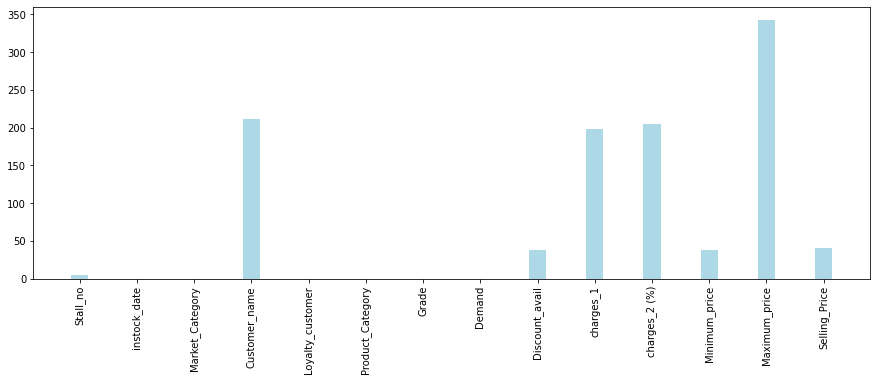

In [7]:
nan_plotter(train)

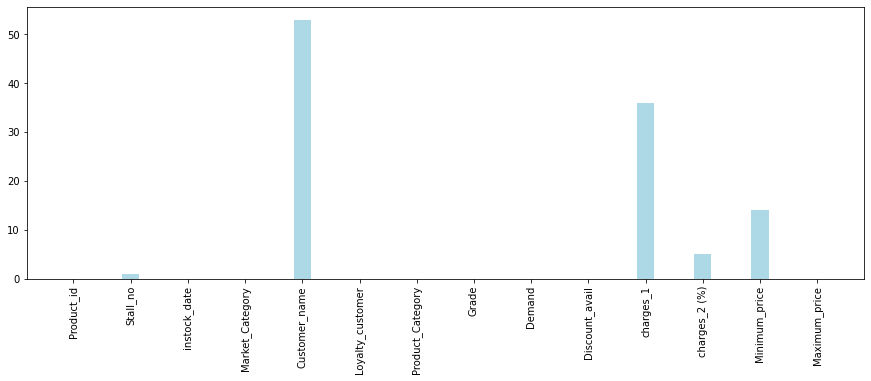

In [ ]:
nan_plotter(test)

In [6]:
# Drop rows where Selling_price is nan
train.dropna(axis=0,subset=["Selling_Price"],inplace=True)

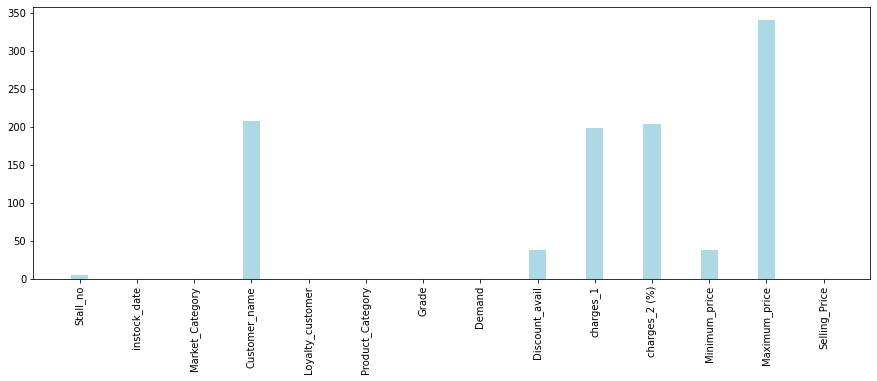

In [9]:
nan_plotter(train)

In [7]:
# As the Discount_avail, Minimum_price, Stall_no is very low nan
train.dropna(axis=0,subset=["Discount_avail","Minimum_price","Stall_no"],inplace=True)

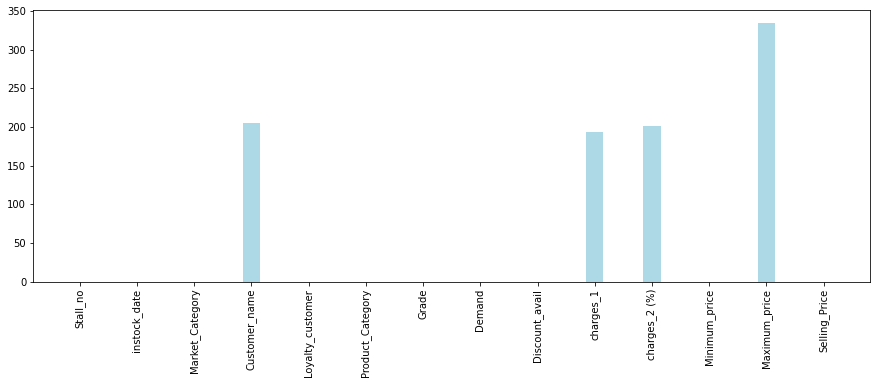

In [11]:
nan_plotter(train)

In [8]:
# Counting unique in customer name
len(train["Customer_name"].unique())

5799

In [9]:
# Dropping Customer_name
train.drop(labels="Customer_name",axis=1,inplace=True)

In [13]:
len(train)

6247

In [33]:
train_2=train.copy()

In [34]:
train_xp=train_2.copy()

In [35]:
# Finding presence of outlier
train_xp.dropna(axis=0,subset=["Maximum_price"],inplace=True)
train_xp.dropna(axis=0,subset=["charges_1"],inplace=True)
train_xp.dropna(axis=0,subset=["charges_2 (%)"],inplace=True)

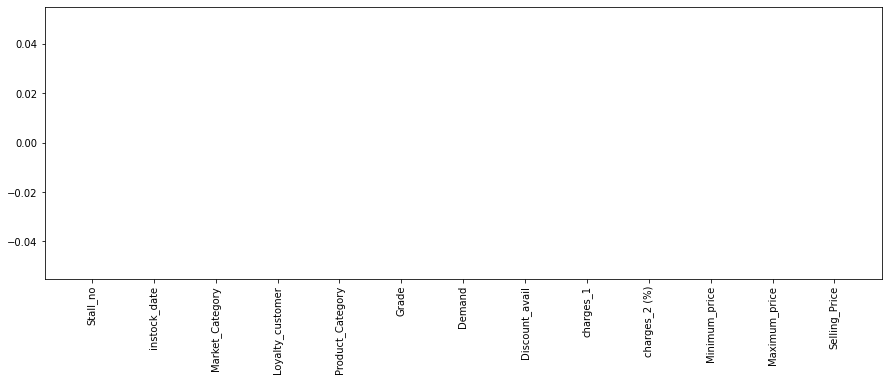

In [36]:
nan_plotter(train_xp)

In [37]:
import numpy as np
import pandas as pd

def detect_outlier(data_1):
    outliers={}
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for idx,y in enumerate(data_1):
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers[idx]=y
    return outliers



In [38]:
out_max=detect_outlier(list(train_xp["Maximum_price"]))

In [39]:
out_ch1=detect_outlier(list(train_xp["charges_1"]))

In [40]:
out_min=detect_outlier(list(train_xp["Minimum_price"]))

In [41]:
out_sel_p=detect_outlier(list(train_xp["Selling_Price"]))

In [42]:
# Data with same indexed outlier
common=[]
for i in list(out_ch1.keys()):
  if i in list(out_max.keys()):
    common.append(i)
  else:
    continue


In [43]:
detect_outlier(list(train_xp["charges_2 (%)"]))

{}

In [44]:
# getting index of oulier
list_outlier=sorted(list(set(list(out_max.keys())+list(out_min.keys())+list(out_sel_p.keys()) + list(out_max.keys()))))

In [45]:
len(list_outlier)

121

In [46]:
# dropping outlier row
train_xp.drop(train_xp.index[list_outlier],inplace=True)

In [47]:
len(train_xp)

5449

In [48]:
# Filling up nan
# maximum_price has outlier, charges_1 has outlier 
#charges_2 (%) has no outlier 
train_xp['charges_2 (%)']=train_xp['charges_2 (%)'].fillna(train_xp['charges_2 (%)'].mean()).astype(int)
train_xp['charges_1']=train_xp['charges_1'].fillna(train_xp['charges_1'].median()).astype(int)
train_xp['Maximum_price']=train_xp['Maximum_price'].fillna(train_xp['Maximum_price'].median()).astype(int)

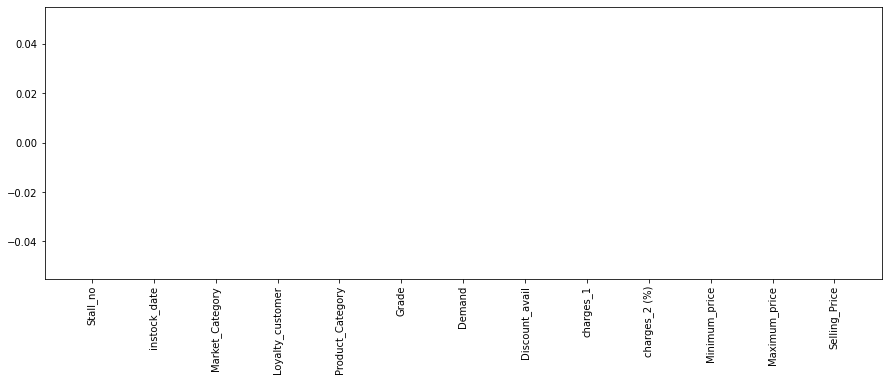

In [49]:
nan_plotter(train_xp)

In [50]:
# Unique counter
def unique_counter(dataset):
  uni=[]
  for i in dataset:
    uni.append((i,len(dataset[i].unique())))
  return uni

In [51]:
unique_counter(train_xp)

[('Stall_no', 50),
 ('instock_date', 4714),
 ('Market_Category', 237),
 ('Loyalty_customer', 2),
 ('Product_Category', 10),
 ('Grade', 4),
 ('Demand', 100),
 ('Discount_avail', 2),
 ('charges_1', 480),
 ('charges_2 (%)', 17),
 ('Minimum_price', 3804),
 ('Maximum_price', 4231),
 ('Selling_Price', 5446)]

### **Noticing Categorical Data**
1. Stall_no
2. Market_Category
3. Grade
4. Loyalty_customer
5. Product_Category
6. Discount_avail

In [52]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_xp['Loyalty_customer']=le.fit_transform(train_xp['Loyalty_customer'])

#test_data['Loyalty_customer']=le.fit_transform(test_data['Loyalty_customer'])


In [53]:
product=train_xp[['Product_Category']]
product=pd.get_dummies(product,drop_first=True)

In [55]:
train_xp=pd.concat([train_xp,product],axis=1)

In [56]:
train_xp.drop(['Product_Category'],axis=1,inplace=True)

In [58]:
train_xp.drop(['instock_date'],axis=1,inplace=True)

In [60]:
train_xp.head()

,Stall_no,Market_Category,Loyalty_customer,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,Product_Category_Cosmetics,Product_Category_Educational,Product_Category_Fashion,Product_Category_Home_decor,Product_Category_Hospitality,Product_Category_Organic,Product_Category_Pet_care,Product_Category_Repair,Product_Category_Technology
0,37.0,2,1,1,68,0.0,376,11,2983.0,4713,4185.947700,0,0,1,0,0,0,0,0,0
1,38.0,24,1,0,51,0.0,397,12,7495.0,10352,9271.490256,0,0,1,0,0,0,0,0,0
2,9.0,447,1,0,10,0.0,250,9,5752.0,7309,6785.701362,0,0,0,0,0,0,0,0,0
4,7.0,63,1,1,35,1.0,211,4,2430.0,9261,906.553935,0,0,0,0,0,0,0,1,0
5,23.0,162,0,1,49,0.0,633,6,3959.0,6104,5631.247872,0,0,0,0,0,0,0,0,1


In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train_xp,train_xp["Selling_Price"],test_size=0.1,random_state=10)

In [64]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(max_depth = 15, random_state=0,n_estimators = 100,verbose = 1)
reg.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.0s finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=1, warm_start=False)

In [65]:
reg.score(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


0.9999888463235307

In [66]:
y_pred=reg.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [67]:
from sklearn.metrics import r2_score
rsquare=r2_score(y_test,y_pred)

In [68]:
rsquare

0.9999403539700609

In [69]:
from sklearn.metrics import mean_squared_error as MSE
import numpy as np
 
rmse = np.sqrt(MSE(y_test,y_pred)) 
print("RMSE : % f" %(rmse)) 

RMSE :  21.053910


In [72]:
import pickle
Pkl_Filename = "/content/drive/MyDrive/Hackathon/HackerEarth Machine Learning Challenge: Carnival Wars/Pickle_rfreg_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(reg, file)

In [ ]:
# Load the Model back from file
Pkl_Filename = "/content/drive/MyDrive/Hackathon/HackerEarth Machine Learning Challenge: Carnival Wars/Pickle_rfreg_Model.pkl"  
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)



### **Test Data**

## **-----------------------------------------------------------------------------------------------------------------**

In [ ]:
! pip install category_encoders

     |████████████████████████████████| 81kB 3.9MB/s 


In [ ]:
import category_encoders as ce

In [ ]:
cat_features=["Stall_no","Market_Category","Grade","Loyalty_customer","Product_Category","Discount_avail"]
# Create the encoder
target_enc = ce.CatBoostEncoder(cols=cat_features)
target_enc.fit(train_xp[cat_features], train_xp['Selling_Price'])

# Transform the features, rename columns with _cb suffix, and join to dataframe
train_CBE = train_xp.join(target_enc.transform(train_xp[cat_features]).add_suffix('_cb'))
#valid_CBE = valid.join(target_enc.transform(valid[cat_features]).add_suffix('_cb'))

# Train a model
#train_model(train_CBE, valid_CBE)

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
train_CBE.head()

,Stall_no,instock_date,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,Stall_no_cb,Market_Category_cb,Grade_cb,Loyalty_customer_cb,Product_Category_cb,Discount_avail_cb
0,37.0,2015-08-22 18:36:12.000,2,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700,4413.790140,5637.222917,5791.361541,4800.125993,4869.622354,5188.600287
1,38.0,2016-03-27 21:19:13.000,24,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256,4485.679672,5568.997872,4400.499091,4800.125993,4869.622354,5188.600287
2,9.0,2015-08-18 19:25:22.000,447,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362,4609.318627,4763.594106,4400.499091,4800.125993,4590.801350,5188.600287
3,50.0,2016-03-28 21:53:01.000,23,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824,4687.316428,4738.650968,4177.002125,4800.125993,4307.270298,5188.600287
4,7.0,2016-03-29 22:58:53.000,63,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935,4730.825112,6274.754316,5791.361541,4800.125993,4629.362965,785.778242


In [ ]:
# Dropping Customer_name
train_CBE.drop(labels=["instock_date","Stall_no","Market_Category","Grade","Loyalty_customer","Product_Category","Discount_avail"],axis=1,inplace=True)

In [ ]:
train_CBE.head()

,Demand,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,Stall_no_cb,Market_Category_cb,Grade_cb,Loyalty_customer_cb,Product_Category_cb,Discount_avail_cb
0,68,376.0,11.0,2983.0,4713.0,4185.947700,4413.790140,5637.222917,5791.361541,4800.125993,4869.622354,5188.600287
1,51,397.0,12.0,7495.0,10352.0,9271.490256,4485.679672,5568.997872,4400.499091,4800.125993,4869.622354,5188.600287
2,10,250.0,9.0,5752.0,7309.0,6785.701362,4609.318627,4763.594106,4400.499091,4800.125993,4590.801350,5188.600287
3,48,144.0,13.0,5090.0,20814.0,13028.917824,4687.316428,4738.650968,4177.002125,4800.125993,4307.270298,5188.600287
4,35,211.0,4.0,2430.0,9261.0,906.553935,4730.825112,6274.754316,5791.361541,4800.125993,4629.362965,785.778242


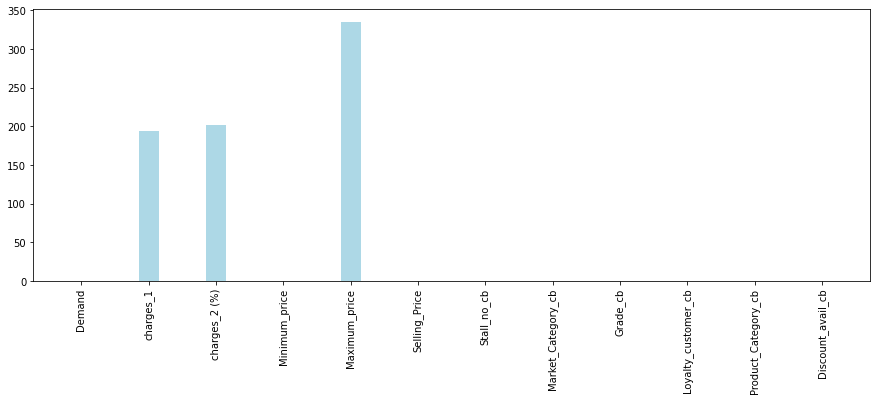

In [ ]:
nan_plotter(train_CBE)

In [ ]:
y=train_CBE["Selling_Price"]

In [ ]:
y

0        4185.947700
1        9271.490256
2        6785.701362
3       13028.917824
4         906.553935
            ...     
6363    10277.520192
6364     4501.837200
6365    10218.878775
6366     5359.493997
6367     5220.013568
Name: Selling_Price, Length: 6247, dtype: float64

In [ ]:
train_CBE.drop(labels="Selling_Price",axis=1,inplace=True)

In [ ]:
column_means = train_CBE.mean()
train_CBE = train_CBE.fillna(column_means)

In [ ]:
len(train_CBE)


6247

In [ ]:
xtrain=train_CBE.iloc[:6000,:].values
xtest=train_CBE.iloc[6000:,:].values
ytrain=y[:6000]
ytest=y[6000:]

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(xtrain, ytrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
pred=regr.predict(xtest)

In [ ]:
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score

In [ ]:
mean_squared_error(pred,ytest)

2771125.6456404566